In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

# DATASET A EXPLORAR

Elegimos el Dataset de Predicción de Destinos AirBNB (kaggle.com)

In [2]:
data = pd.read_csv('train_users_2.csv', delimiter = ',')

#renamed_columns = {'ID': 'user_id', 'Fechacreacioncuenta': 'date_account_created', 'Timestamp1erActividad': 'timestamp_first_active', 'Fecha1erreserva': 'date_first_booking', 'Genero': 'gender', 'Edad': 'age', 'MetododeRegistro': 'signup_method', 'FlujodeRegistro': 'signup_flow', 'Lenguaje': 'language', 'CanaldeAfiliado': 'affiliate_channel', 'ProveedorAfiliado': 'affiliate_provider', 'Firstaffiliatetracked': 'first_affiliate_tracked', 'Registro': 'signup_app', 'PrimerDispositivo':'first_device_type', 'PrimerNavegador': 'first_browser', 'Destino': 'country_destination}

# ANÁLISIS EXPLORATORIO

## DIMENSIONES DEL DATASET

In [3]:
data.shape

(213451, 16)

## TIPOS DE DATOS EN CADA COLUMNA

In [4]:
data.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## CONTENIDO DE LOS DATOS

Procedemos a observar las primeras 10 filas en el Dataset, y a obtener información estadística de las variables numéricas.

In [5]:
data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [6]:
data.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


## DEFINICIÓN DE VARIABLES

## CHEQUEAR
- **'id'**: es un identificador de usuario --> No será utilizada
- **'date_account_created'**: indica la fecha de alta del usuario --> No será utilizada
- **'timestamp_first_active'**: marca de tiempo de la primera actividad en el sitio --> No será utilizada
- **'date_first_booking'**: fecha de la primer reserva --> No será utilizada
- **'gender'**: genero del usuario --> Entrada
- **'age'**: Edad del usuario --> Entrada
- **'signup_method'**: Método del registro, forma de loguearse --> Entrada
- **'signup_flow'**: Página desde la que llegó el usuario para registrarse --> No se usa
- **'language'**:	Idioma, preferencia de idioma internacional --> Entrada
- **'affiliate_channel'**:	Tipo de marketing pagado --> No se usa
- **'affiliate_provider'**: En dónde se publico la publicidad --> No se usa
- **'first_affiliate_tracked'**: Con qué anuncio pagado interactuó por primera vez el usuario --> No se usa
- **'signup_app'**: Con qué servicio se registró --> Entrada
- **'first_device_type'** indica con qué dispositivo se registró el usuario ---> Entrada
- **'first_browser'** indica con qué navegador web se registró el usuario --> No será utilizada
- **'country_destination'** indica en qué país realizó su primer reserva el usuario --> No será utilizada


## Variable 'gender':

In [7]:
data.gender

0         -unknown-
1              MALE
2            FEMALE
3            FEMALE
4         -unknown-
            ...    
213446         MALE
213447    -unknown-
213448    -unknown-
213449    -unknown-
213450    -unknown-
Name: gender, Length: 213451, dtype: object

#### Visualizamos los diferentes valores existentes en la columna 'gender'

In [8]:
data['gender'].value_counts().keys().tolist()

['-unknown-', 'FEMALE', 'MALE', 'OTHER']

#### Visualizamos la cantidad de veces que aparecen estos valores

In [9]:
data['gender'].value_counts().tolist()

[95688, 63041, 54440, 282]

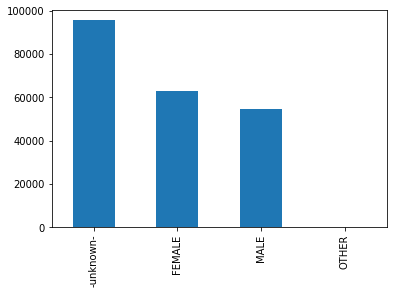

In [10]:
data.gender.value_counts().sort_index().plot.bar()

#### Porcentaje de valores nulos

In [11]:
data.gender.value_counts()['-unknown-'] / len(data)*100

44.82902399145471

#### Existe 40% de filas sin la variable gender, probamos completarlos y analizar los resultados

#### Reemplazamos los valores -unknown- por Null

In [12]:
data = data.replace(to_replace ="-unknown-", 
                 value =np.nan)

In [13]:
data.gender.isnull().sum()

95688

#### Visualizamos que porcentaje representan cada variable de gender sobre el total de no nulos

In [14]:
data.gender.value_counts()['FEMALE'] / data.gender.count() *100

53.53209412124351

In [15]:
data.gender.value_counts()['MALE'] / data.gender.count() *100

46.228441870536585

In [16]:
data.gender.value_counts()['OTHER'] / data.gender.count() *100

0.23946400821989927

#### Usamos el metodo ffill para rellenar los valores nulos

In [17]:
data['gender'].fillna( method ='ffill', inplace = True)

#### El metodo ffill propaga la última observación válida hacia adelante, como el 1er valor del data es null no lo rellena

In [18]:
data.gender.isnull().sum()

1

In [19]:
data['gender'] = data['gender'].replace([np.nan], 'FEMALE')

In [20]:
data.gender.isnull().sum()

0

#### Visualizamos nuevamente los diferentes valores existentes en la columna 'gender'

In [21]:
data['gender'].value_counts().keys().tolist()

['FEMALE', 'MALE', 'OTHER']

#### Visualizamos nuevamente la cantidad de veces que aparecen estos valores

In [22]:
data['gender'].value_counts().tolist()

[114514, 98433, 504]

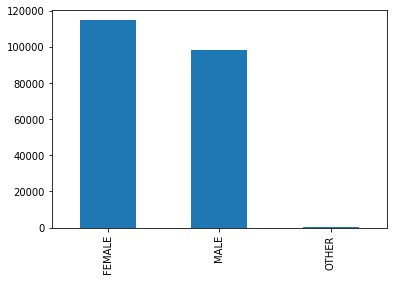

In [23]:
data.gender.value_counts().sort_index().plot.bar()

#### Despues de rellenar los valores nulos visualizamos que porcentaje representan cada variable de gender sobre el total de no nulos

In [24]:
data.gender.value_counts()['FEMALE'] / data.gender.count() *100

53.64884680793251

In [25]:
data.gender.value_counts()['MALE'] / data.gender.count() *100

46.11503342687549

In [26]:
data.gender.value_counts()['OTHER'] / data.gender.count() *100

0.23611976519201128

#### Vemos que, al rellenar valores nulos, la distribución de los valores practicamente se mantuvo

#### Convertimos la columna categórica 'gender', en columnas con valores 0 y 1

In [27]:
sexo = pd.get_dummies(data['gender'])

In [28]:
data = pd.concat([data,sexo],axis=1)

In [29]:
data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,FEMALE,MALE,OTHER
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,FEMALE,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,1,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,0,1,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,1,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1,0,0
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,FEMALE,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,1,0,0
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1,0,0
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,1,0,0
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1,0,0
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,FEMALE,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,1,0,0


## Variable 'age':

#### Verificamos valores nulos

In [30]:
data.age.isnull().sum()

87990

#### Porcentaje valores nulos

In [31]:
data.age.isnull().sum() / len(data) *100

41.222575673105304

#### Descripción de la variable 'age'

In [32]:
data.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

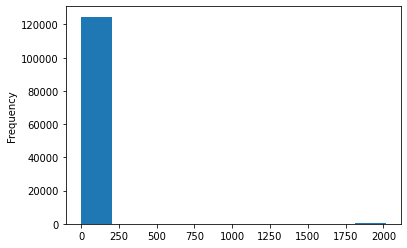

In [33]:
data.age.plot.hist()

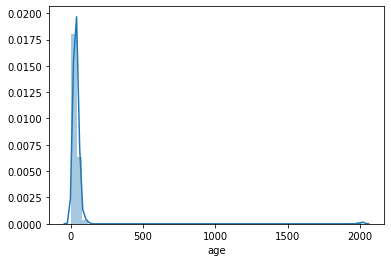

In [34]:
sns.distplot(data['age'].dropna())

#### Para una mejor comprension generamos un gráfico de caja

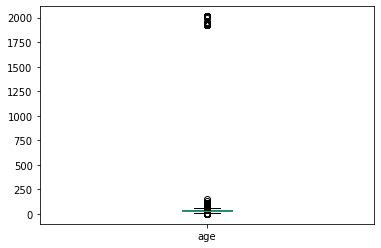

In [35]:
data.age.plot.box()

#### Visualizamos valores atípicos por lo que procedemos a eliminar las filas que los contienen

In [36]:
data = data.drop(data[(data.age > 100)].index)

In [37]:
data = data.drop(data[(data.age < 18)].index)

#### Visualizamos cómo quedan los datos luego de la eliminación

In [38]:
data.age.describe()

count    122958.000000
mean         36.575619
std          11.681366
min          18.000000
25%          28.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

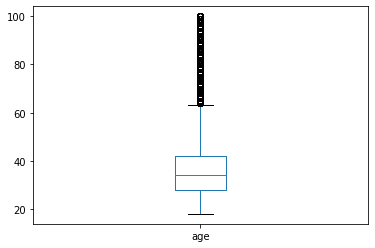

In [39]:
data.age.plot.box()

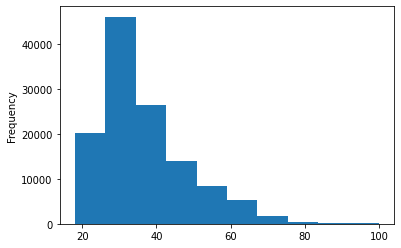

In [40]:
data.age.plot.hist()

#### Rellenamos los datos faltantes de edad con el metodo fillnan

In [41]:
data["age"].fillna( method ='ffill', inplace = True)

#### El metodo ffill propaga la última observación válida hacia adelante, como el 1er valor del dataset es null no lo rellena

In [42]:
data.age.isnull().sum()

1

In [43]:
data['age'] = data['age'].replace([np.nan], 30)

In [44]:
data.age.isnull().sum()

0

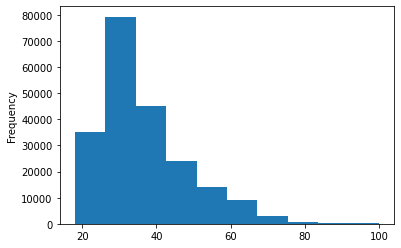

In [45]:
data.age.plot.hist()

#### Se agrega la columna rango etario

In [46]:
limite = [18, 35, 65, np.inf]
categoria = ['Adulto Joven', 'Adulto', 'Adulto Mayor']

data['rango_etario'] = pd.cut(data['age'], bins=limite, labels=categoria, right=False)

#### Convertimos la columna categórica rango etario, en columnas con valores 0 y 1

In [47]:
re = pd.get_dummies(data['rango_etario'])

In [48]:
data = pd.concat([data,re],axis=1)

In [49]:
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,FEMALE,MALE,OTHER,rango_etario,Adulto Joven,Adulto,Adulto Mayor
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,FEMALE,30.0,facebook,0,en,direct,...,Mac Desktop,Chrome,NDF,1,0,0,Adulto Joven,1,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,Mac Desktop,Chrome,NDF,0,1,0,Adulto,0,1,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Windows Desktop,IE,US,1,0,0,Adulto,0,1,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Mac Desktop,Firefox,other,1,0,0,Adulto,0,1,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,FEMALE,41.0,basic,0,en,direct,...,Mac Desktop,Chrome,US,1,0,0,Adulto,0,1,0


## Variable 'signup_method'


In [50]:
data.signup_method

0         facebook
1         facebook
2            basic
3         facebook
4            basic
            ...   
213446       basic
213447       basic
213448       basic
213449       basic
213450       basic
Name: signup_method, Length: 210948, dtype: object

####  Visualizamos los diferentes valores existentes en al columna 'signup_method'

In [51]:
data['signup_method'].value_counts().keys().tolist()

['basic', 'facebook', 'google']

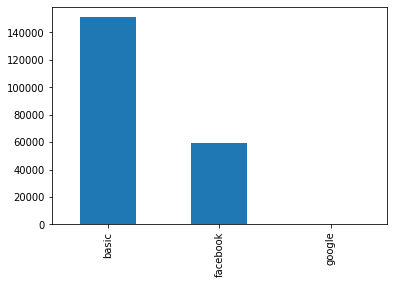

In [52]:
data.signup_method.value_counts().sort_index().plot.bar()

#### Porcentaje de valores nulos

In [53]:
#EXPLOTA
#data.signup_method.value_counts()['-unknown-'] / len(data)*100

#### Convertimos la columna categórica 'signup_method', en columnas con valores 0 y 1

In [54]:
metodo_registro= pd.get_dummies(data['signup_method'])

In [55]:
data = pd.concat([data,metodo_registro],axis=1)

In [56]:
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,FEMALE,MALE,OTHER,rango_etario,Adulto Joven,Adulto,Adulto Mayor,basic,facebook,google
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,FEMALE,30.0,facebook,0,en,direct,...,1,0,0,Adulto Joven,1,0,0,0,1,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,0,1,0,Adulto,0,1,0,0,1,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,1,0,0,Adulto,0,1,0,1,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,1,0,0,Adulto,0,1,0,0,1,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,FEMALE,41.0,basic,0,en,direct,...,1,0,0,Adulto,0,1,0,1,0,0


## Variable 'language'

In [57]:
data.language

0         en
1         en
2         en
3         en
4         en
          ..
213446    en
213447    en
213448    en
213449    en
213450    en
Name: language, Length: 210948, dtype: object

####  Visualizamos los diferentes valores existentes en la columna 'language'

In [58]:
data['language'].value_counts().keys().tolist()

['en',
 'zh',
 'fr',
 'es',
 'ko',
 'de',
 'it',
 'ru',
 'pt',
 'ja',
 'sv',
 'nl',
 'tr',
 'da',
 'pl',
 'cs',
 'no',
 'el',
 'th',
 'id',
 'hu',
 'fi',
 'ca',
 'is',
 'hr']

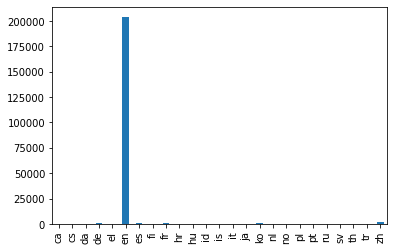

In [59]:
data.language.value_counts().sort_index().plot.bar()

#### Convertimos la columna categórica 'language', en columnas con valores 0 y 1

In [60]:
idioma= pd.get_dummies(data['language'])

In [61]:
data = pd.concat([data,idioma],axis=1)

In [62]:
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,ko,nl,no,pl,pt,ru,sv,th,tr,zh
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,FEMALE,30.0,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,FEMALE,41.0,basic,0,en,direct,...,0,0,0,0,0,0,0,0,0,0


# Variables no utilizadas justificación
- signup_flow: no se utiliza debido a que consideramos que esta variable no representa una condición importante para determinar la variable de salida
- affiliate_channel: no se utiliza debido a que consideramos que no es una variable importante

La variable **'first_affiliate_tracked'** indica

In [63]:
#len(data[data['first_affiliate_tracked'].isnull()])

In [64]:
#data['first_affiliate_tracked'].value_counts()

La variable **'signup_app'** indica con qué aplicación se registró el usuario. Será utilizada como variable de **Entrada**.

## Variable 'signup_app'

In [65]:
data.signup_app

0         Web
1         Web
2         Web
3         Web
4         Web
         ... 
213446    Web
213447    Web
213448    Web
213449    iOS
213450    iOS
Name: signup_app, Length: 210948, dtype: object

#### Visualizamos los diferentes valores existentes en la columna 'signup_app' y cuántas veces aparecen

In [66]:
data['signup_app'].value_counts()

Web        180413
iOS         18914
Moweb        6194
Android      5427
Name: signup_app, dtype: int64

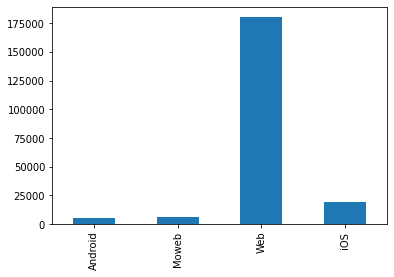

In [67]:
data['signup_app'].value_counts().sort_index().plot.bar()

#### Cantidad de valores nulos

In [68]:
data.signup_app.isnull().sum()

0

#### Convertimos la columna categórica 'signup app' en columnas con valores 0 y 1

In [69]:
app_registro = pd.get_dummies(data['signup_app'])

In [70]:
data = pd.concat([data,app_registro],axis=1)

In [71]:
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,pt,ru,sv,th,tr,zh,Android,Moweb,Web,iOS
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,FEMALE,30.0,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,1,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,0,0,0,0,0,0,0,0,1,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,0,0,0,0,0,0,0,0,1,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,1,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,FEMALE,41.0,basic,0,en,direct,...,0,0,0,0,0,0,0,0,1,0


## Variable 'first_device_type'

In [72]:
data.first_device_type

0             Mac Desktop
1             Mac Desktop
2         Windows Desktop
3             Mac Desktop
4             Mac Desktop
               ...       
213446        Mac Desktop
213447    Windows Desktop
213448        Mac Desktop
213449             iPhone
213450             iPhone
Name: first_device_type, Length: 210948, dtype: object

#### Visualizamos los diferentes valores existentes en la columna 'first_device_type' y cuántas veces aparecen

In [73]:
data['first_device_type'].value_counts()

Mac Desktop           88463
Windows Desktop       71811
iPhone                20617
iPad                  14184
Other/Unknown         10566
Android Phone          2777
Android Tablet         1270
Desktop (Other)        1185
SmartPhone (Other)       75
Name: first_device_type, dtype: int64

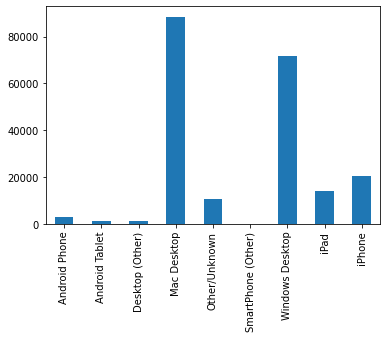

In [74]:
data['first_device_type'].value_counts().sort_index().plot.bar()

#### Cantidad de valores nulos

In [75]:
data.first_device_type.isnull().sum()

0

In [76]:
#### Convertimos la columna categórica 'signup app' en columnas con valores 0 y 1

In [77]:
dispositivo = pd.get_dummies(data['first_device_type'])

In [78]:
data = pd.concat([data,dispositivo],axis=1)

In [79]:
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,iOS,Android Phone,Android Tablet,Desktop (Other),Mac Desktop,Other/Unknown,SmartPhone (Other),Windows Desktop,iPad,iPhone
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,FEMALE,30.0,facebook,0,en,direct,...,0,0,0,0,1,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,0,0,0,0,1,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,0,0,0,0,0,0,0,1,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,0,0,0,0,1,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,FEMALE,41.0,basic,0,en,direct,...,0,0,0,0,1,0,0,0,0,0


## Variable 'reserva':

#### Para crear la variable 'reserva', que indicará si una cuenta en particular realizó una reserva o no en AirBNB, comenzaremos analizando la variable 'country_destination'

In [80]:
data.country_destination

0           NDF
1           NDF
2            US
3         other
4            US
          ...  
213446      NDF
213447      NDF
213448      NDF
213449      NDF
213450      NDF
Name: country_destination, Length: 210948, dtype: object

#### Visualizamos los diferentes valores existentes en la columna 'country_destination' y cuántas veces aparecen

In [81]:
data['country_destination'].value_counts()

NDF      123383
US        61436
other      9930
FR         4961
IT         2787
GB         2286
ES         2219
CA         1406
DE         1044
NL          750
AU          531
PT          215
Name: country_destination, dtype: int64

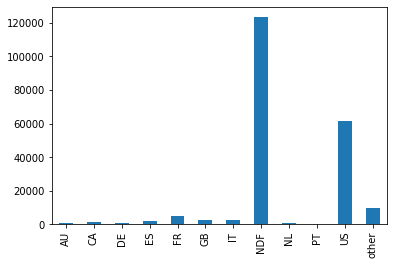

In [82]:
data['country_destination'].value_counts().sort_index().plot.bar()

#### Cantidad de valores nulos

In [83]:
data.country_destination.isnull().sum()

0

#### Procedemos a agrupar los datos de acuerdo a si reservaron o no. Aquellas filas con valores 'NDF' (No Destination Found) se les asignará el valor booleando "False" mientras que al resto se les asignará "True".

In [84]:
data['reserva'] = data.country_destination != 'NDF'
data['reserva'].value_counts()

False    123383
True      87565
Name: reserva, dtype: int64

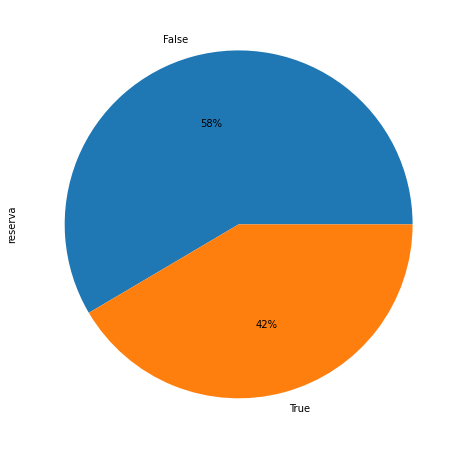

In [85]:
data.reserva.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

#### Observamos que los datos se encuentran ligeramente desbalanceados, pero consideramos que puede ser representativo del dominio del problema en donde haya una mayoría de cuentas que se crean para explorar el sitio web pero no terminan realizando ninguna reserva.

## VARIABLES NO UTILIZADAS

#### Eliminamos del Dataset las variables que decidimos no utilizar.

In [86]:
data.drop("id",axis = 1,inplace = True)
data.drop("date_account_created",axis = 1,inplace = True)
data.drop("timestamp_first_active",axis = 1,inplace = True)
data.drop("date_first_booking",axis = 1,inplace = True)
data.drop("signup_flow",axis = 1,inplace = True)
data.drop("affiliate_channel",axis = 1,inplace = True)
data.drop("country_destination",axis = 1,inplace = True)

# ANÁLISIS DETALLADO DE VARIABLES DE ENTRADA Y SU RELACIÓN CON LA VARIABLE DE SALIDA

## Variable 'gender':

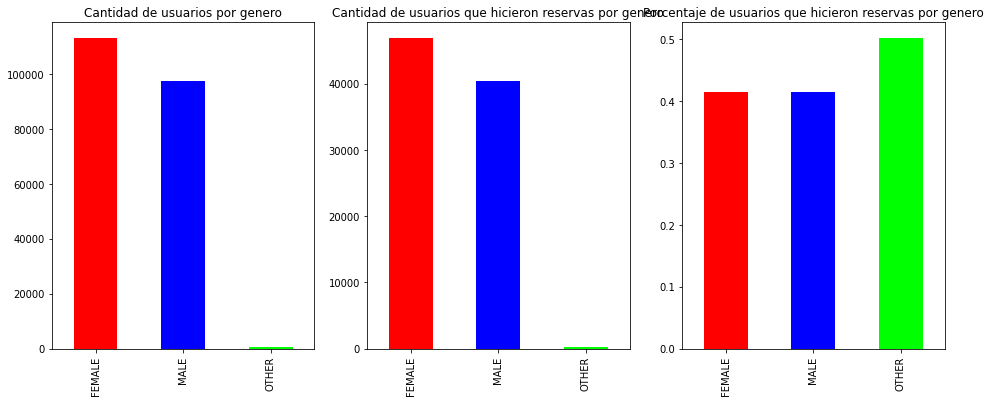

In [87]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('Cantidad de usuarios por genero')
data.gender.value_counts().sort_index().plot.bar(ax=ax[0], color=["#FF0000","#0000FF","#00FF00"])
ax[1].set_title('Cantidad de usuarios que hicieron reservas por genero')
data[data.reserva == True].gender.value_counts().sort_index().plot.bar(ax=ax[1], color=["#FF0000","#0000FF","#00FF00"])
ax[2].set_title('Porcentaje de usuarios que hicieron reservas por genero')
(data[data.reserva == True].gender.value_counts().sort_index() / data.gender.value_counts().sort_index()).plot.bar(ax=ax[2], color=["#FF0000","#0000FF","#00FF00"])

### Conclusiones: 
   - En el sitio hay una mayor participacion de usuarios mujeres que hombres.
   - Se observa que existen mayor cantidad de reservas hechas por mujeres que por hombres
   - Al realizar el porcetaje de reservas realizadas por sexo, observamos que si bien el genero 'other' es minoritario, tienen una mayor probabilidad de realizar una reserva, mientras que las personas con genero femenino o masculino son similares.

## Variable 'age':

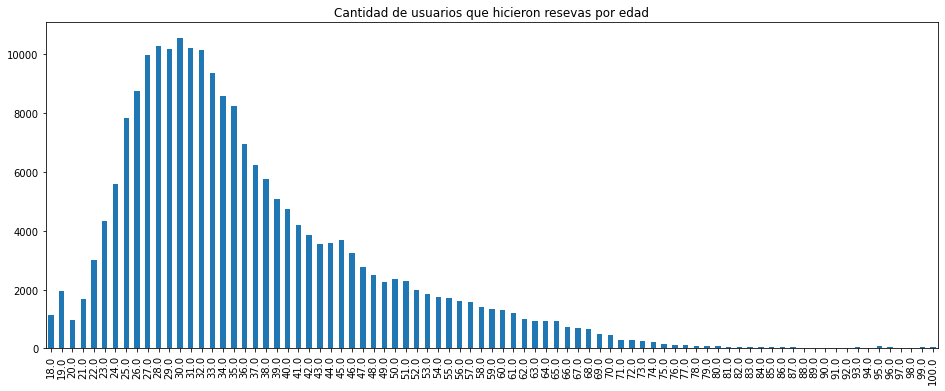

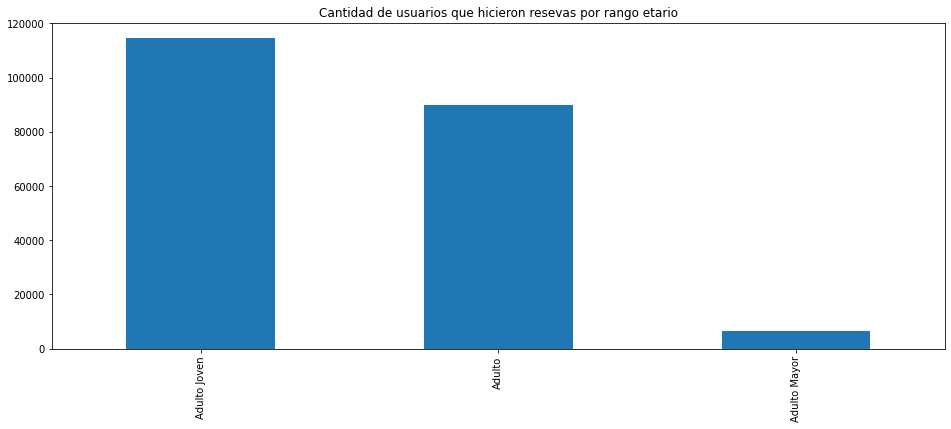

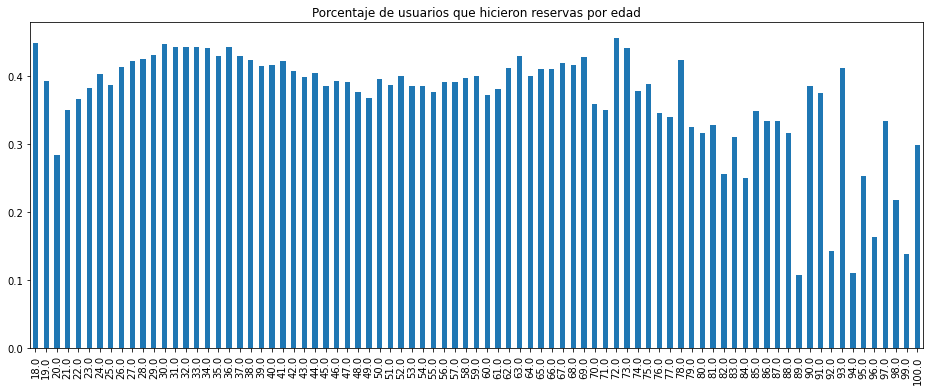

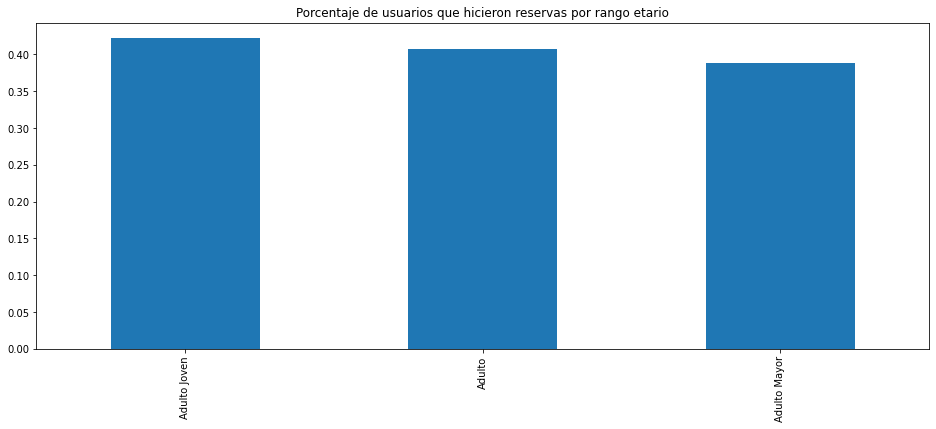

In [88]:
f,ax=plt.subplots(1,1,figsize=(16,6))
ax.set_title('Cantidad de usuarios que hicieron resevas por edad')
data.age.value_counts().sort_index().plot.bar(ax=ax)

f,ax1=plt.subplots(1,1,figsize=(16,6))
ax1.set_title('Cantidad de usuarios que hicieron resevas por rango etario')
data.rango_etario.value_counts().sort_index().plot.bar(ax=ax1)

f,ax2=plt.subplots(1,1,figsize=(16,6))
ax2.set_title('Porcentaje de usuarios que hicieron reservas por edad')
(data[data.reserva == True].age.value_counts().sort_index() / data.age.value_counts().sort_index()).plot.bar(ax=ax2)

f,ax3=plt.subplots(1,1,figsize=(16,6))
ax3.set_title('Porcentaje de usuarios que hicieron reservas por rango etario')
(data[data.reserva == True].rango_etario.value_counts().sort_index() / data.rango_etario.value_counts().sort_index()).plot.bar(ax=ax3)

### Conclusiones: 
   - Se observa que los usuarios que mas participan en el sitio son "Adultos Jovenes" tienen entre 18 y 35 años, predominando mayormente los usuarios de 30 años. 
   - Se observa que a la hora de realizar reservas no existen diferencias de probabilidades entre los diferentes rangos etarios

## Variable 'language':

Como mencionamos anteriormente, contamos con 25 valores posibles correspondientes al idioma materno de los usuarios del sitio

In [90]:
data['language'].value_counts().keys()

Index(['en', 'zh', 'fr', 'es', 'ko', 'de', 'it', 'ru', 'pt', 'ja', 'sv', 'nl',
       'tr', 'da', 'pl', 'cs', 'no', 'el', 'th', 'id', 'hu', 'fi', 'ca', 'is',
       'hr'],
      dtype='object')

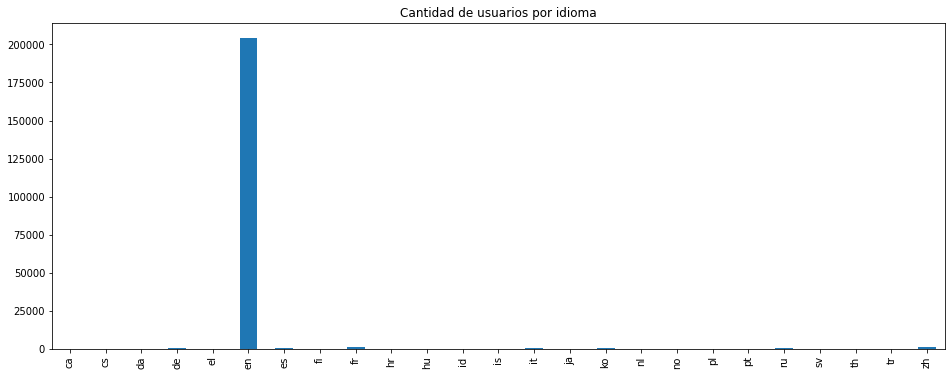

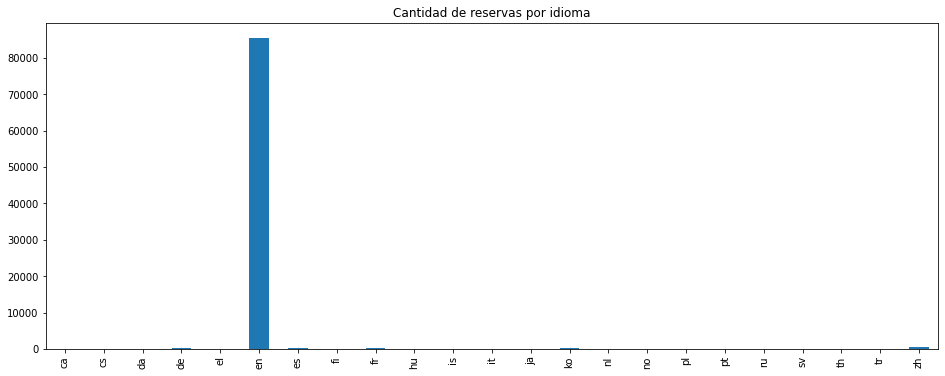

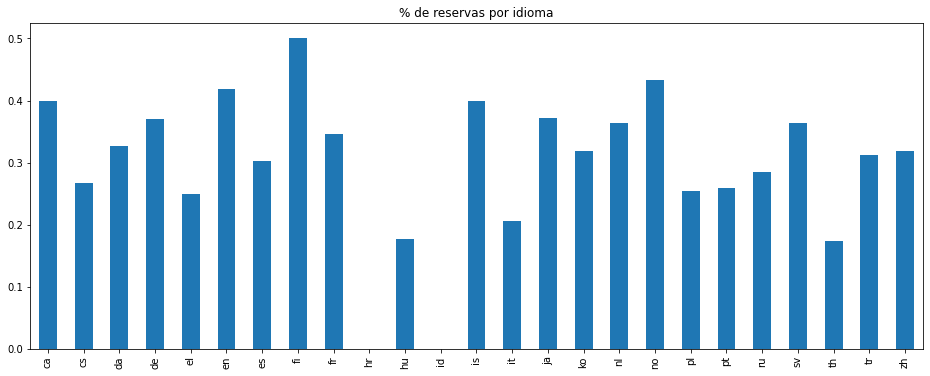

In [91]:
f,ax=plt.subplots(1,1,figsize=(16,6))
ax.set_title('Cantidad de usuarios por idioma')
data.language.value_counts().sort_index().plot.bar(ax=ax)

f,ax2=plt.subplots(1,1,figsize=(16,6))
ax2.set_title('Cantidad de reservas por idioma')
data[data.reserva == True].language.value_counts().sort_index().plot.bar(ax=ax2)

f,ax3=plt.subplots(1,1,figsize=(16,6))
ax3.set_title('% de reservas por idioma')
(data[data.reserva == True].language.value_counts().sort_index() / data.language.value_counts().sort_index()).plot.bar(ax=ax3)

### Conclusiones: 
    - La mayoría de los usuarios tienen como lengua materna el Inglés, No solo son la mayoría en el sitio, sino que también son los que mayores cantidades de reservas realizadas.
    - Sin embargo, el último gráfico muestra que los usuarios de habla finlandesa, poseen el mayor porcentaje de reservas realizadas. Mientras que los usuarios con idioma húngaro e indonesio practicamente no han realizado reservas.

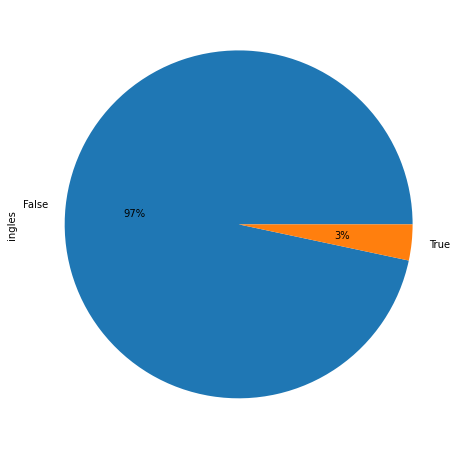

In [92]:
data['ingles'] = data.language != 'en'
data['ingles'].value_counts()
data.ingles.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

    - Los usuarios que no hablan inglés son una minoría dentro del sitio.

## Variable 'signup_method':

In [93]:
data['signup_method'].value_counts().keys()

Index(['basic', 'facebook', 'google'], dtype='object')

Tenemos 3 tipos de métodos de registro: Facebook, Basic, Google.
Siendo Google el menos utilizado

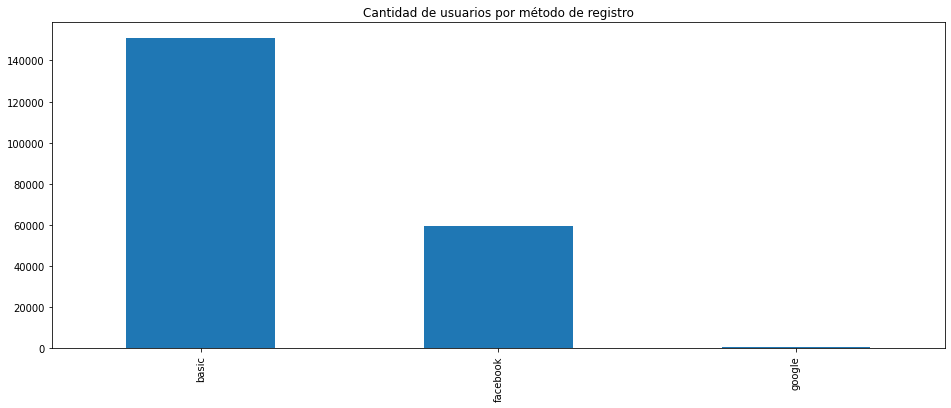

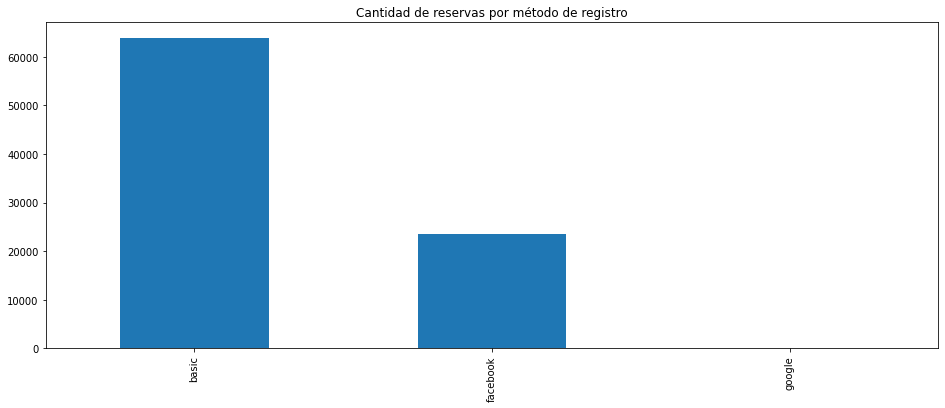

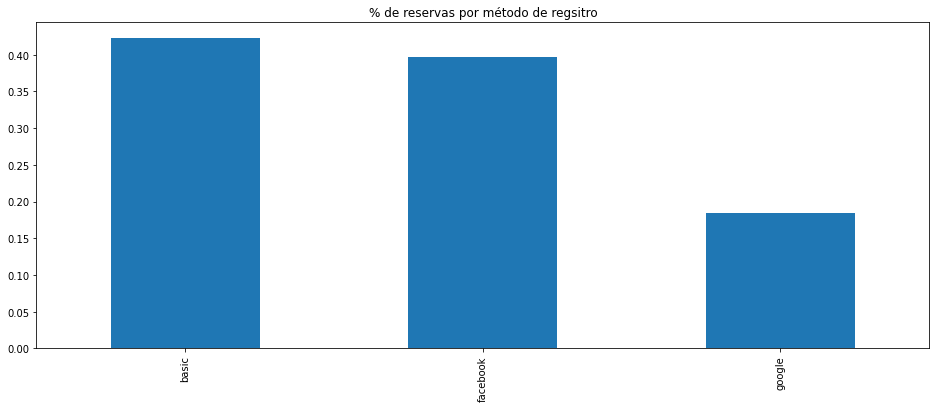

In [94]:
f,ax=plt.subplots(1,1,figsize=(16,6))
ax.set_title('Cantidad de usuarios por método de registro')
data.signup_method.value_counts().sort_index().plot.bar(ax=ax)

f,ax2=plt.subplots(1,1,figsize=(16,6))
ax2.set_title('Cantidad de reservas por método de registro')
data[data.reserva == True].signup_method.value_counts().sort_index().plot.bar(ax=ax2)

f,ax3=plt.subplots(1,1,figsize=(16,6))
ax3.set_title('% de reservas por método de regsitro')
(data[data.reserva == True].signup_method.value_counts().sort_index() / data.signup_method.value_counts().sort_index()).plot.bar(ax=ax3)

### Conclusiones:
    - La mayoría de los usuarios que se registran con el método básico (registrandose desde el formulario de Airbnb) son los que mayores probabilidades presentan de realizar posteriores reservas.
    - Los usuarios que se registran desde Google representan una minoría en el sitio, y tienen marcadamente menos probabilidades de concretar una reserva.

In [95]:
data['facebook'] = data.signup_method == 'facebook'
data['facebook'].value_counts()

True     151577
False     59371
Name: facebook, dtype: int64

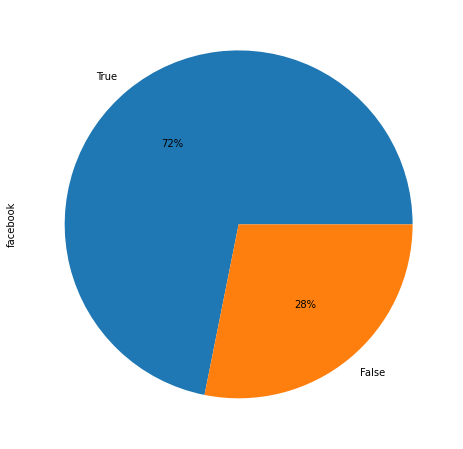

In [96]:
data.facebook.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

        - En este gráfico se puede observar el porcentaje de aquellos usuarios que se registran desde Facebook con respecto a los demás métodos de registros.

## Variable 'signup_app'

In [98]:
data['signup_app'].value_counts().keys()

Index(['Web', 'iOS', 'Moweb', 'Android'], dtype='object')

De los 4 aplicaciones de registro que vimos anteriormente, podemos considerar como dispositivos móviles a 'iOS', 'Moweb' y 'Android'.

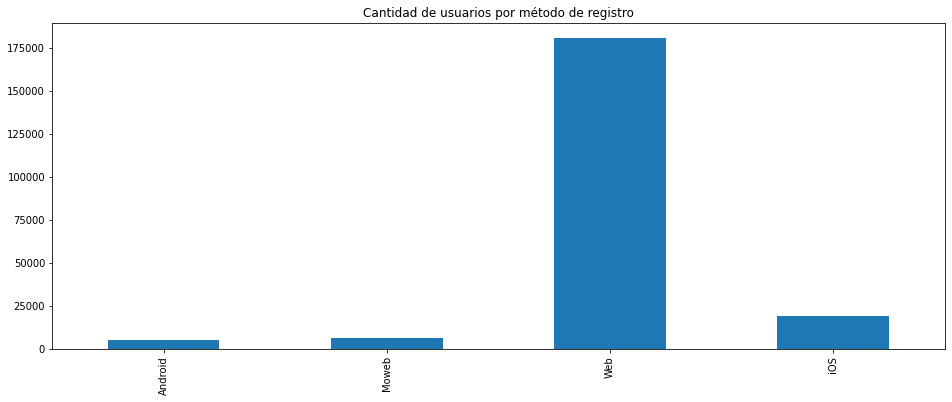

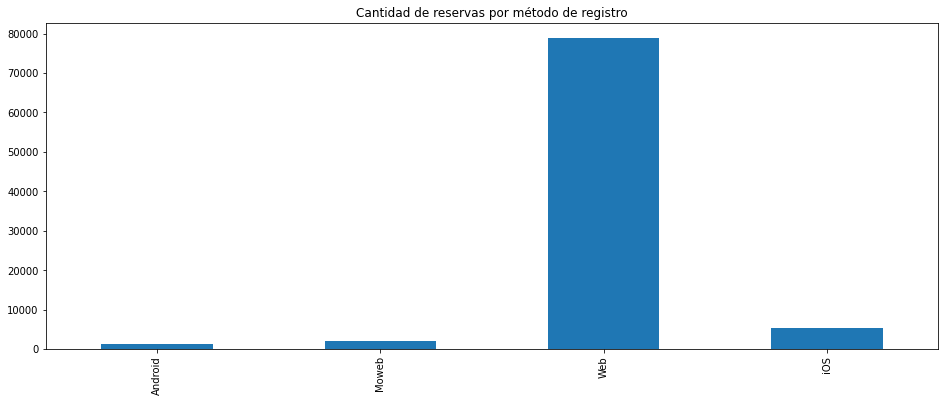

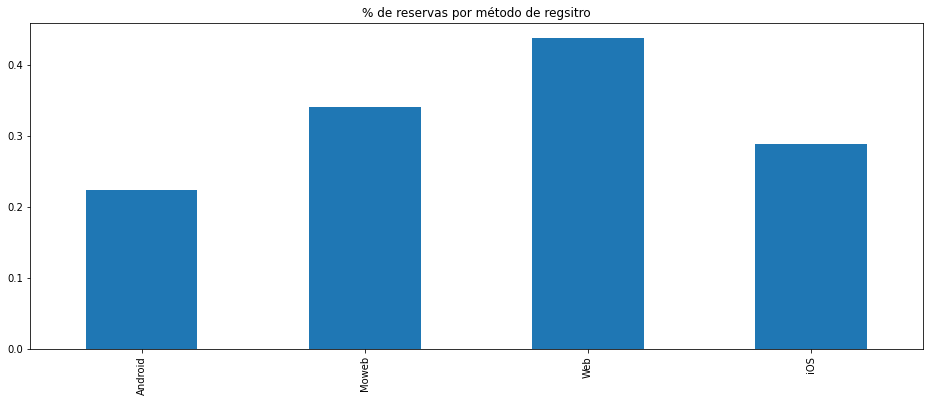

In [100]:
f,ax=plt.subplots(1,1,figsize=(16,6))
ax.set_title('Cantidad de usuarios por método de registro')
data.signup_app.value_counts().sort_index().plot.bar(ax=ax)

f,ax2=plt.subplots(1,1,figsize=(16,6))
ax2.set_title('Cantidad de reservas por método de registro')
data[data.reserva == True].signup_app.value_counts().sort_index().plot.bar(ax=ax2)

f,ax3=plt.subplots(1,1,figsize=(16,6))
ax3.set_title('% de reservas por método de regsitro')
(data[data.reserva == True].signup_app.value_counts().sort_index() / data.signup_app.value_counts().sort_index()).plot.bar(ax=ax3)

## Conclusiones
    - Observamos que los usuarios que se registran vía Web son la amplia mayoría y además tienen mayores probabilidades de realizar una reserva.
    - Por el contrario, los usuarios que se registran mediante cualquier dispositivo móvil (Android, Moweb e iOS) son una minoría  